# DS 300: Data Mining - Convolutional Nerual Networks

## Introduction:

#### In this lab, we will practice building CNN models with the Cifar10 dataset [link](https://www.cs.toronto.edu/~kriz/cifar.html).

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

Available labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. 

Here are 10 random images from each labeled category:
![Image](https://miro.medium.com/max/824/1*SZnidBt7CQ4Xqcag6rd8Ew.png)						


## Question 1: Prerequisite

#### Import all the basic libraries

In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#### Define some constants we are going to use

In [3]:
# Number of classes in the label is 10
num_classes = 10

# Batch size for CNN training is 50
batch_size = 50

# Number of epoches for CNN training is 20
epochs = 20

In [1]:
#conda install -c anaconda keras

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## Question 2:

#### Load `cifar10` dataset from `keras.datasets` by using the `load_data()` method. Use names as `x_train`, `y_train`, `x_test`, and `y_test`. This step takes 270 seconds on my computer at home, but lucky you: the campus network is much faster. 

In [ ]:
# load dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()




#### Print the following information.

In [1]:
print('x_train shape: ', X_train.shape)

print('y_train shape: ', y_train.shape)
print('Number of train samples: ',X_train.shape[0])
print('Number of test samples: ',y_test.shape[0])



NameError: name 'X_train' is not defined

## Question 3: 
#### We need to divide the image data by 255 in order to normalize it into 0-1 range, after converting it into floating point values. 

In [40]:
# prepare x dataset
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize into 0-1
X_train = X_train/255
X_test = X_test/255


#### Find how many images we have for each label in `y_train`. Hint: you can create a DataFrame.

In [41]:
df = pd.DataFrame(y_train)
df.head()

,0
0,6
1,9
2,9
3,4
4,1


In [42]:
df.value_counts()

9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
dtype: int64

## Question 4:

#### Create a dictionary to assign a name to each label. The labels are ordered as follows: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. For example, 'airplane' has the key of 0.

In [43]:
# give a name to each label
label = {0:'airplane', 1:'automobile', 2:'bird',3:'cat', 4:'deer', 5:'dog',
         6:'frog', 7:'horse', 8:'ship', 9: 'truck'}


print(label)




{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


#### Convert training and testing target labels to binary class matrices

In [44]:
# Convert class vectors to binary class matrices.
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)

y_test = to_categorical(y_test, 10) 

#### Print the following information

In [45]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Question 5:

#### Visualize the first 10 images with descriptive titles as shown.

---



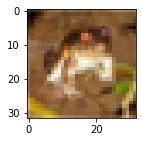

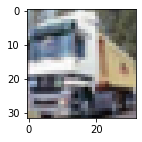

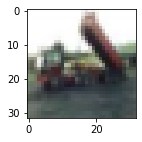

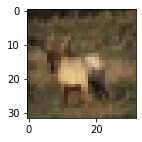

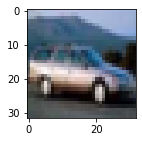

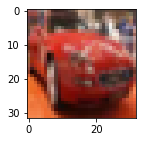

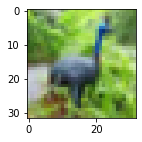

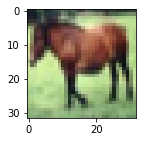

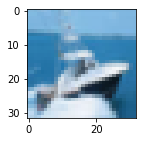

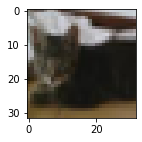

In [60]:
for i in range(10):
    plt.figure(figsize=(2, 2))
    label = y_train[i].argmax(axis=0)
    
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray_r'))
    
    
    plt.show()

## Question 6:

#### Now create a sequential CNN model that generates the following model information.

+ We'll start with a 2D convolution of the image - it's set up to take 32 "feature detectors" or "filters", of each image, each feature detector being 3x3 in size. Use rectifier function as the activation function.

+ Next we apply a MaxPooling2D layer that takes the maximum of each 2x2 result to distill the results down into something more manageable.

+ We then run a second convolution on top of that with 32 3x3 windows. Use again the rectifier function.

+ Again, we apply a MaxPooling2D layer that takes the maximum of each 2x2 result.

+ A dropout filter is then applied to prevent overfitting. Use drop out rate as 25%.

+ Next we flatten the 2D layer we have at this stage into a 1D layer. So at this point we can just pretend we have a traditional multi-layer perceptron and feed that into a fully connected layer of 512 units.

+ We then apply dropout again to further prevent overfitting. This time use drop out rate 50%. 

+ And finally, we feed that into our final 10 units where softmax is applied to choose our category of 0-9.

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#### Create the layers for the model.

In [48]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))



model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)              

## Question 7:

#### Compile the model with the given optimizer.

In [49]:
# initiate Adam optimizer
from keras.optimizers import Adam
opt = Adam(lr=0.0001, decay=1e-6)

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics='accuracy')




#### Train the model with training and validation data. 

In [50]:
history = model.fit(X_train,y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test, y_test))






Epoch 1/20
98/98 [==============================] - 2s 24ms/step - loss: 1.6610 - accuracy: 0.3984 - val_loss: 1.3490 - val_accuracy: 0.5278
Epoch 2/20
98/98 [==============================] - 2s 22ms/step - loss: 1.2849 - accuracy: 0.5408 - val_loss: 1.1623 - val_accuracy: 0.5892
Epoch 3/20
98/98 [==============================] - 2s 22ms/step - loss: 1.1465 - accuracy: 0.5928 - val_loss: 1.0760 - val_accuracy: 0.6221
Epoch 4/20
98/98 [==============================] - 2s 22ms/step - loss: 1.0534 - accuracy: 0.6298 - val_loss: 0.9955 - val_accuracy: 0.6527
Epoch 5/20
98/98 [==============================] - 2s 22ms/step - loss: 0.9812 - accuracy: 0.6544 - val_loss: 0.9594 - val_accuracy: 0.6662
Epoch 6/20
98/98 [==============================] - 2s 21ms/step - loss: 0.9225 - accuracy: 0.6769 - val_loss: 0.9378 - val_accuracy: 0.6716
Epoch 7/20
98/98 [==============================] - 2s 22ms/step - loss: 0.8619 - accuracy: 0.6985 - val_loss: 0.9016 - val_accuracy: 0.6859
Epoch 8/20
98

## Question 8:

#### Evaluate model with loss and accuracy.

In [51]:
# Score trained model.
score = model.evaluate(X_test, y_test)

print("test loss: ", score[0])
print("test accuracy: ", score[1])






313/313 [==============================] - 1s 3ms/step - loss: 0.8562 - accuracy: 0.7239
test loss:  0.856208860874176
test accuracy:  0.7239000201225281


#### Plot the model accuracy graph over epochs.

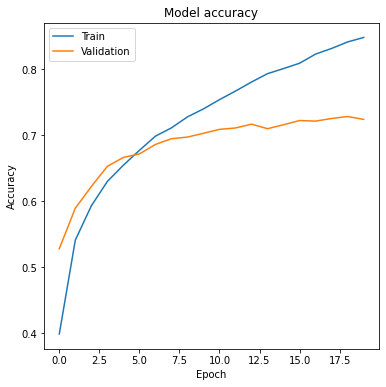

In [52]:
plt.figure(figsize=(6, 6))
plt.title('Model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Question 9:

#### Generate predicted results on test data

In [53]:
y_pred = model.predict(X_test)



In [54]:
y_pred[0]

array([0.00085337, 0.00071042, 0.00617039, 0.5660498 , 0.00231357,
       0.32087407, 0.05723126, 0.0052886 , 0.03841082, 0.00209764],
      dtype=float32)

#### Plot the image, predicted label and the true label.

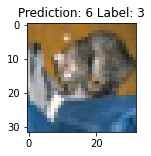

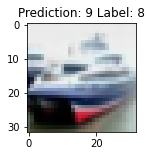

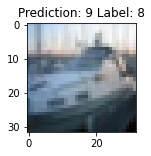

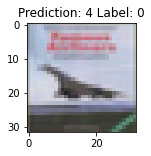

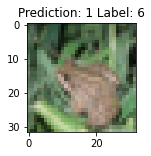

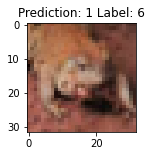

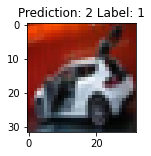

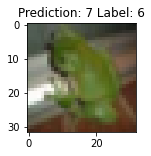

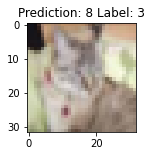

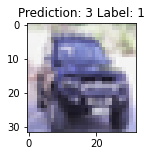

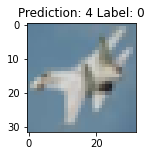

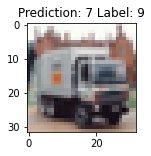

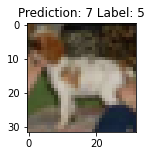

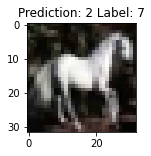

<Figure size 144x144 with 0 Axes>

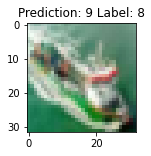

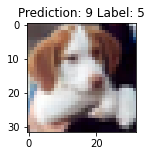

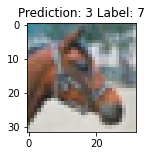

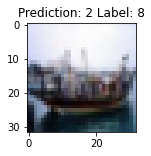

<Figure size 144x144 with 0 Axes>

In [69]:
# show image, prediction and actual label
for i in range(20):
    plt.figure(figsize=(2, 2))
    label = y_train[i].argmax()
    
    true_label = y_test[i].argmax()
    
    if (label != true_label):
        plt.title('Prediction: %d Label: %d' % (label, true_label))

        plt.imshow(X_test[i], cmap=plt.get_cmap('gray_r'))
        plt.show()
    
    
    
    
    plt.show()

## Question 10:

#### In the CNN model we built, we used an architecture like: conv1 (32, 3x3) --> maxpooling --> conv2 (32, 3x3) --> maxpooling ...
#### Try to boost the validation accuracy of the model by changing the architecture to `VGG` architecture in the following way: conv1 (32, 3x3)  --> conv2 (32, 3x3) --> maxpooling1 --> dropout1 (25%) --> conv3 (64, 3x3)  --> conv4 (64, 3x3) --> maxpooling2 --> dropout2 (25%)  --> flatten1 --> ANN.
#### Without changing the number of epochs, let's see how much we can get improved.


In [63]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))



model.summary()




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)              

In [70]:
# initiate Adam optimizer
from keras.optimizers import Adam
opt = Adam(lr=0.0001, decay=1e-6)

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics='accuracy')



In [ ]:
history = model.fit(X_train,y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test, y_test))



Epoch 1/20
98/98 [==============================] - 6s 59ms/step - loss: 1.6034 - accuracy: 0.4225 - val_loss: 1.3068 - val_accuracy: 0.5341
Epoch 2/20
98/98 [==============================] - 6s 56ms/step - loss: 1.2149 - accuracy: 0.5664 - val_loss: 1.1234 - val_accuracy: 0.6094
Epoch 3/20
98/98 [==============================] - 6s 57ms/step - loss: 1.0297 - accuracy: 0.6389 - val_loss: 0.9926 - val_accuracy: 0.6534
Epoch 4/20
98/98 [==============================] - 6s 57ms/step - loss: 0.8921 - accuracy: 0.6862 - val_loss: 0.9201 - val_accuracy: 0.6794
Epoch 5/20
98/98 [==============================] - 5s 55ms/step - loss: 0.7887 - accuracy: 0.7246 - val_loss: 0.8626 - val_accuracy: 0.7025
Epoch 6/20
98/98 [==============================] - 5s 55ms/step - loss: 0.6842 - accuracy: 0.7622 - val_loss: 0.8292 - val_accuracy: 0.7181
Epoch 7/20
98/98 [==============================] - 5s 54ms/step - loss: 0.5916 - accuracy: 0.7934 - val_loss: 0.8587 - val_accuracy: 0.7083
Epoch 8/20
98

In [70]:
plt.figure(figsize=(6, 6))
plt.title('Model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Note: the model is still under-fitted with 20 epochs. Validation accuracy can get at least another 5% increase if number of epochs is greater. 

## Great job!